In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
data = pd.read_csv('/home/csl-4/Documents/7348/ASSIGNMENT5/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = data.iloc[:, [2,3]].values
y = data.iloc[:, 4].values

In [4]:
def train_and_evaluate(test_size, random_state):
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    model = LogisticRegression(random_state=random_state)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return cm, accuracy, precision, recall

In [5]:
configs = [
    (0.25, 0),
    (0.25, 42),
    (0.30, 0),
    (0.30, 42),
    (0.20, 1),
    (0.20, 10)
]

for test_size, random_state in configs:
    cm, acc, prec, rec = train_and_evaluate(test_size, random_state)
    
    print(f"\nTest Size: {test_size}, Random State: {random_state}")
    print("Confusion Matrix:\n", cm)
    print("Accuracy:", round(acc, 4))
    print("Precision:", round(prec, 4))
    print("Recall:", round(rec, 4))


Test Size: 0.25, Random State: 0
Confusion Matrix:
 [[65  3]
 [ 8 24]]
Accuracy: 0.89
Precision: 0.8889
Recall: 0.75

Test Size: 0.25, Random State: 42
Confusion Matrix:
 [[61  2]
 [12 25]]
Accuracy: 0.86
Precision: 0.9259
Recall: 0.6757

Test Size: 0.3, Random State: 0
Confusion Matrix:
 [[74  5]
 [11 30]]
Accuracy: 0.8667
Precision: 0.8571
Recall: 0.7317

Test Size: 0.3, Random State: 42
Confusion Matrix:
 [[71  2]
 [16 31]]
Accuracy: 0.85
Precision: 0.9394
Recall: 0.6596

Test Size: 0.2, Random State: 1
Confusion Matrix:
 [[41  7]
 [ 6 26]]
Accuracy: 0.8375
Precision: 0.7879
Recall: 0.8125

Test Size: 0.2, Random State: 10
Confusion Matrix:
 [[48  4]
 [ 5 23]]
Accuracy: 0.8875
Precision: 0.8519
Recall: 0.8214


Confusion Matrix:
 [[61  2]
 [12 25]]
TP: 25 FP: 2 TN: 61 FN: 12
Accuracy: 0.86
Error Rate: 0.14
Precision: 0.9259259259259259
Recall: 0.6756756756756757


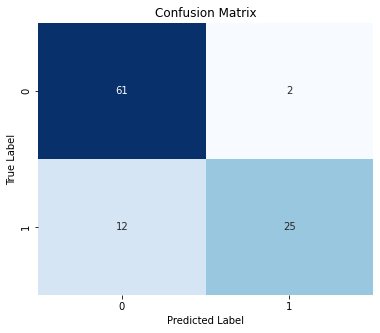

In [14]:
cm, accuracy, precision, recall = train_and_evaluate(test_size=0.25, random_state=42)

TN, FP, FN, TP = cm.ravel()

print("Confusion Matrix:\n", cm)
print("TP:", TP, "FP:", FP, "TN:", TN, "FN:", FN)
print("Accuracy:", accuracy)
print("Error Rate:", 1-accuracy)
print("Precision:", precision)
print("Recall:", recall)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()